In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE

import umap

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
ReviewData = pd.read_csv("game_overview.csv")
#ReviewData = pd.read_csv("D:\my data\export_dataframe.csv")
ReviewData.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [6]:
steamReviews = pd.read_csv("steam_reviews.csv")

ReviewData = steamReviews.loc[steamReviews['title'] == "ARK: Survival Evolved"]
#ReviewData = steamReviews

ReviewData= ReviewData.reset_index(drop=True)

ReviewData.head(30)

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2017-10-23,0,0,1476,False,Not Recommended,Before i start the review THE GAMEPLAY OF THIS...,ARK: Survival Evolved
1,2015-08-16,724,2396,1094,True,Recommended,This is a review of the offline game. This gam...,ARK: Survival Evolved
2,2017-12-11,1,4,3250,False,Recommended,),ARK: Survival Evolved
3,2016-09-08,0,0,0,True,Not Recommended,NaN,ARK: Survival Evolved
4,2016-10-30,0,0,63,True,Not Recommended,The most unbalanced PvP (PvE is a joke) surviv...,ARK: Survival Evolved
5,2015-06-13,247,5666,13,False,Recommended,Professors Review Game Pros Open World Weapons...,ARK: Survival Evolved
6,2016-09-08,0,0,714,True,Not Recommended,Ark Evolved has provided me with hundreds of h...,ARK: Survival Evolved
7,2015-12-21,0,0,64,True,Recommended,Really good game! Needs a lot more updates not...,ARK: Survival Evolved
8,2015-10-27,0,0,1426,True,Recommended,Greetings one and all. I want to express my fe...,ARK: Survival Evolved
9,2017-08-30,0,0,1062,False,Not Recommended,Though the basic idea is a good one the game i...,ARK: Survival Evolved


In [4]:
# load number of each game
SortedGameData =pd.read_csv("D:\my data\SortedData.csv")

    
SortedGameData.head(50)


,Name,Number
0,empty,0
1,Expansion - Hearts of Iron IV: Man the Guns,3
2,Dead by Daylight,22221
3,Wargroove,10
4,Wallpaper Engine,170
5,Factorio,170
6,Insurgency: Sandstorm,220
7,Cold Waters,10
8,Tannenberg,10
9,Pathfinder: Kingmaker,10


In [56]:
#remove low number games

number = SortedGameData.loc[:,"Number"].values
for x in range(len(number)):
    if number[x] <1000:
        SortedGameData= SortedGameData.drop([x],axis= 0)
        



SortedGameData.head(10)

,Name,Number
2,Dead by Daylight,22221
10,MONSTER HUNTER: WORLD,18412
19,Rocket League®,67907
22,ASTRONEER,2661
26,Grand Theft Auto V,99956
29,RESIDENT EVIL 2 / BIOHAZARD RE:2,1385
37,PLAYERUNKNOWN'S BATTLEGROUNDS,145685
40,Rust,71088
46,The Elder Scrolls V: Skyrim Special Edition,1473


In [43]:
print(len(SortedGameData[]))

NameError: name 'SortedGameData' is not defined

In [19]:
# remove the games with less than 100 reviews from overall dataset

names = SortedGameData.loc[:,"Name"].values

startBaby= "horseape"

for x in range(len(names)):
    dataChunk = ReviewData.loc[ReviewData['title'] == names[x]]
    if  type(startBaby) is str:
        startBaby = dataChunk
    else:
        startBaby = pd.concat([startBaby, dataChunk], ignore_index=True)


startBaby.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
1,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight
2,2016-12-12,4,55,2694,False,Recommended,ENGLISH After playing for more than two years ...,Dead by Daylight
3,2017-09-17,12,228,48,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2018-12-24,295,219,71,False,Recommended,I have never been told to kill myself more tha...,Dead by Daylight


In [20]:
preFormattedData =startBaby

In [9]:
# turn date into numbers

from sklearn import preprocessing

date = preFormattedData.loc[:,"date_posted"].values

numerizedDates = []

for x in range(len(date)):
    year = date[x][0:4]
    month = date[x][5:7]
    day = date[x][8:10]

    year = int(year)
    month = int(month)
    day = int(day)

    newDate = year*100+month
    newDate = newDate *100 +day
    numerizedDates.append(newDate)


#numerizedDates = np.array(numerizedDates)
    
#numerizedDates= numerizedDates.reshape(-1, 1)

#normalized = preprocessing.normalize(numerizedDates)
#numerizedDates= StandardScaler().fit_transform(numerizedDates)



In [21]:
# get vader scores from reviews

textReviews = preFormattedData.loc[:,"review"].values

analyzer = SentimentIntensityAnalyzer()

import time
time_start = time.time()

vaderScoresComp = []
vaderScoresPos = []
vaderScoresNeg = []
vaderScoresNeu = []


for x in range(len(textReviews)):
    if type(textReviews[x]) is float:
        textReviews[x] = str(textReviews[x])
    vs = analyzer.polarity_scores(textReviews[x])
    vaderScoresComp.append(vs["compound"])
    vaderScoresPos.append(vs["pos"])
    vaderScoresNeg.append(vs["neg"])
    vaderScoresNeu.append(vs["neu"])



print("done")
print(format(time.time()-time_start))

done
314.6099946498871


In [22]:
names =SortedGameData.loc[:,"Name"].values
numbers = SortedGameData.loc[:,"Number"].values


allNewData = []

startIndex = 0
for x in range(len(names)):
    individualGameData =[]
    
    for num in range(200):
        if num < numbers[x]:
            individualGameData.append(vaderScoresComp[num+startIndex])
            individualGameData.append(vaderScoresPos[num+startIndex])
            individualGameData.append(vaderScoresNeg[num+startIndex])
            individualGameData.append(vaderScoresNeu[num+startIndex])
        else:
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
    allNewData.append(np.transpose(individualGameData))
    startIndex = startIndex +numbers[x]
        
    

formattedDataForPCA =allNewData
allNewData =np.transpose(allNewData)
longdata =pd.DataFrame(data = allNewData, columns = names)

longdata.to_csv (r'D:\my data\longdataSorted.csv', index = False, header=True)

longdata.head(10)

,Dead by Daylight,Wallpaper Engine,Factorio,Insurgency: Sandstorm,MONSTER HUNTER: WORLD,Divinity: Original Sin 2 - Definitive Edition,Garry's Mod,Terraria,Sid Meier’s Civilization® VI,Rocket League®,...,Slay the Spire,Stardew Valley,PLAYERUNKNOWN'S BATTLEGROUNDS,Don't Starve Together,Rust,Subnautica,Left 4 Dead 2,ARK: Survival Evolved,The Elder Scrolls V: Skyrim Special Edition,Human: Fall Flat
0,0.7405,-0.5562,-0.3504,0.9274,0.9793,0.9557,-0.4215,0.9984,0.0000,0.9980,...,0.4404,-0.2960,-0.2960,-0.9789,-0.9962,-0.7912,0.6240,0.9365,0.9747,0.8834
1,0.1610,0.2810,0.0190,0.3720,0.2650,0.1450,0.0000,0.1980,0.0000,0.2410,...,0.7440,0.2230,0.1780,0.1030,0.1090,0.0280,0.1490,0.2350,0.1950,0.1900
2,0.1450,0.5970,0.0200,0.0500,0.0530,0.0610,0.0700,0.0710,0.0000,0.0370,...,0.0000,0.3300,0.2290,0.1180,0.1710,0.1480,0.0620,0.0250,0.0300,0.0580
3,0.6940,0.1220,0.9610,0.5790,0.6830,0.7940,0.9300,0.7300,1.0000,0.7210,...,0.2560,0.4460,0.5930,0.7790,0.7200,0.8230,0.7890,0.7400,0.7740,0.7520
4,-0.8976,0.7506,0.8619,-0.3793,0.9815,0.9982,0.9681,0.9468,0.8442,0.9895,...,0.8427,0.9832,-0.5971,0.9215,0.9733,0.9298,0.7990,0.8867,0.9245,0.9705
5,0.1370,0.2860,0.1510,0.2290,0.1430,0.1720,0.1670,0.1680,0.7300,0.1660,...,0.1270,0.2260,0.0390,0.4410,0.2110,0.1220,0.5900,0.0900,0.1010,0.2940
6,0.1570,0.0000,0.0590,0.2540,0.0980,0.0890,0.0800,0.0800,0.0000,0.0070,...,0.0180,0.0390,0.1330,0.0000,0.0490,0.0940,0.1250,0.0580,0.0450,0.0630
7,0.7060,0.7140,0.7900,0.5180,0.7590,0.7390,0.7530,0.7520,0.2700,0.8270,...,0.8550,0.7350,0.8290,0.5590,0.7400,0.7840,0.2850,0.8520,0.8540,0.6430
8,-0.9841,0.0000,0.9096,0.8553,0.7372,0.8283,0.9508,0.9370,0.8519,0.9416,...,0.9201,0.5777,0.6740,-0.2617,0.4808,0.4611,0.3182,0.0000,-0.2755,0.4215
9,0.0820,0.0000,0.1490,0.3430,0.1250,0.1580,0.2010,0.2000,0.1850,0.1450,...,0.3440,0.1140,0.0850,0.0000,0.2330,0.1310,1.0000,0.0000,0.0000,1.0000


In [44]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(formattedDataForPCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()



,principal component 1,principal component 2
0,-9.008904,-0.251131
1,7.289995,-0.088949
2,-9.455271,-1.893802
3,4.267700,0.970656
4,7.680287,-8.084849


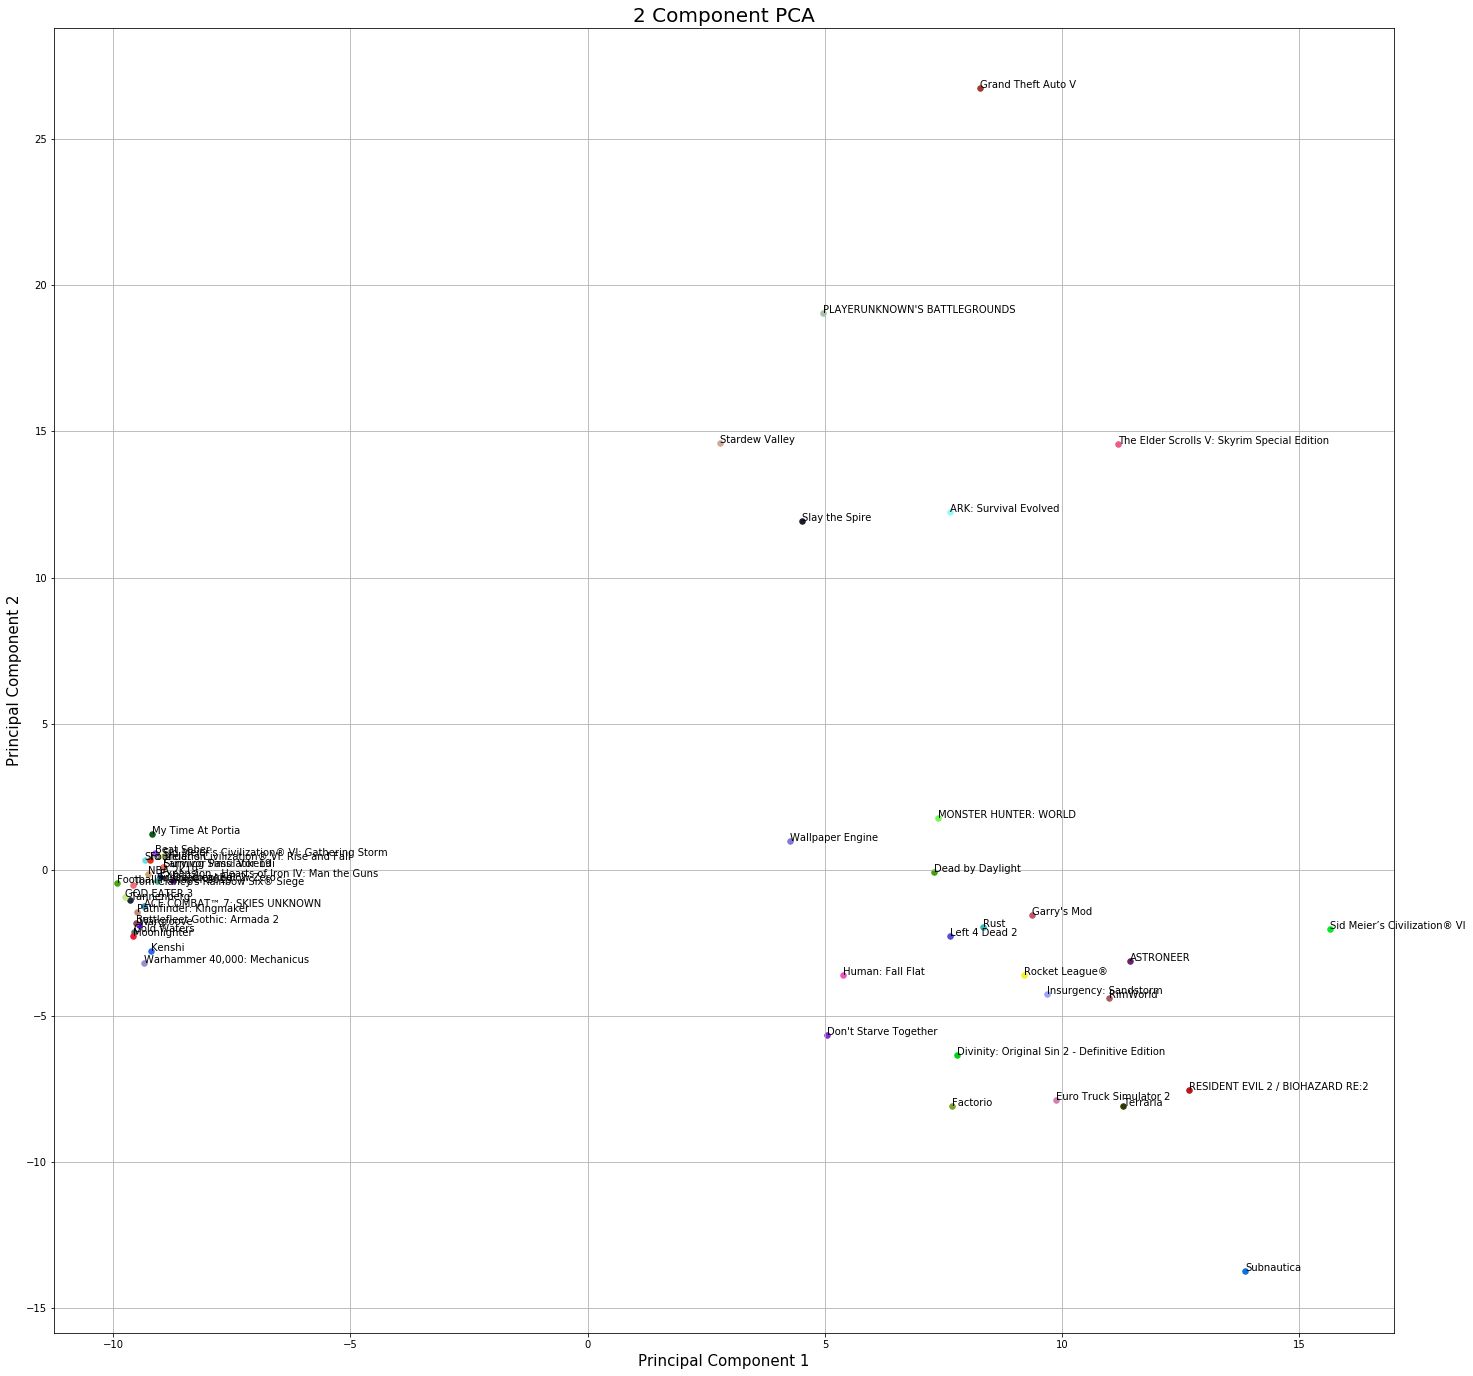

In [45]:

p1 =principalDf.loc[:,"principal component 1"].values;
p2 =principalDf.loc[:,"principal component 2"].values;
name =SortedGameData.loc[:,"Name"].values;



dataforPlot = [ p1,p2,name]

dataforPlot = np.transpose(dataforPlot)
tempnames = ["principal component 1","principal component 2","title"]

finalDf = pd.DataFrame(data = dataforPlot, columns = tempnames)




fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*3 , box.height*3])

targets = []
colors = []

titles = finalDf.loc[:,"title"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['title'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 30)

ax.grid()

for x in range(len(titles)):
    ax.text(p1[x] , p2[x], titles[x], fontsize=10)

#ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))


In [53]:
import time
time_start = time.time()


X_embedded = TSNE(n_components=2,perplexity=2,n_iter =15000).fit_transform(formattedDataForPCA)
print(format(time.time()-time_start))

0.4980285167694092


In [54]:
tSNEdata = pd.DataFrame(data = X_embedded
             , columns = ['tSNE component 1', 'tSNE component 2'])



tSNEdataFinal = pd.concat([tSNEdata, finalDf[['title']]], axis = 1)
tSNEdataFinal.head(5)

,tSNE component 1,tSNE component 2,title
0,6.500237,-91.748550,Expansion - Hearts of Iron IV: Man the Guns
1,-14.534026,10.630230,Dead by Daylight
2,-98.442032,189.541260,Wargroove
3,-22.300201,-176.191849,Wallpaper Engine
4,-70.728935,-104.232574,Factorio


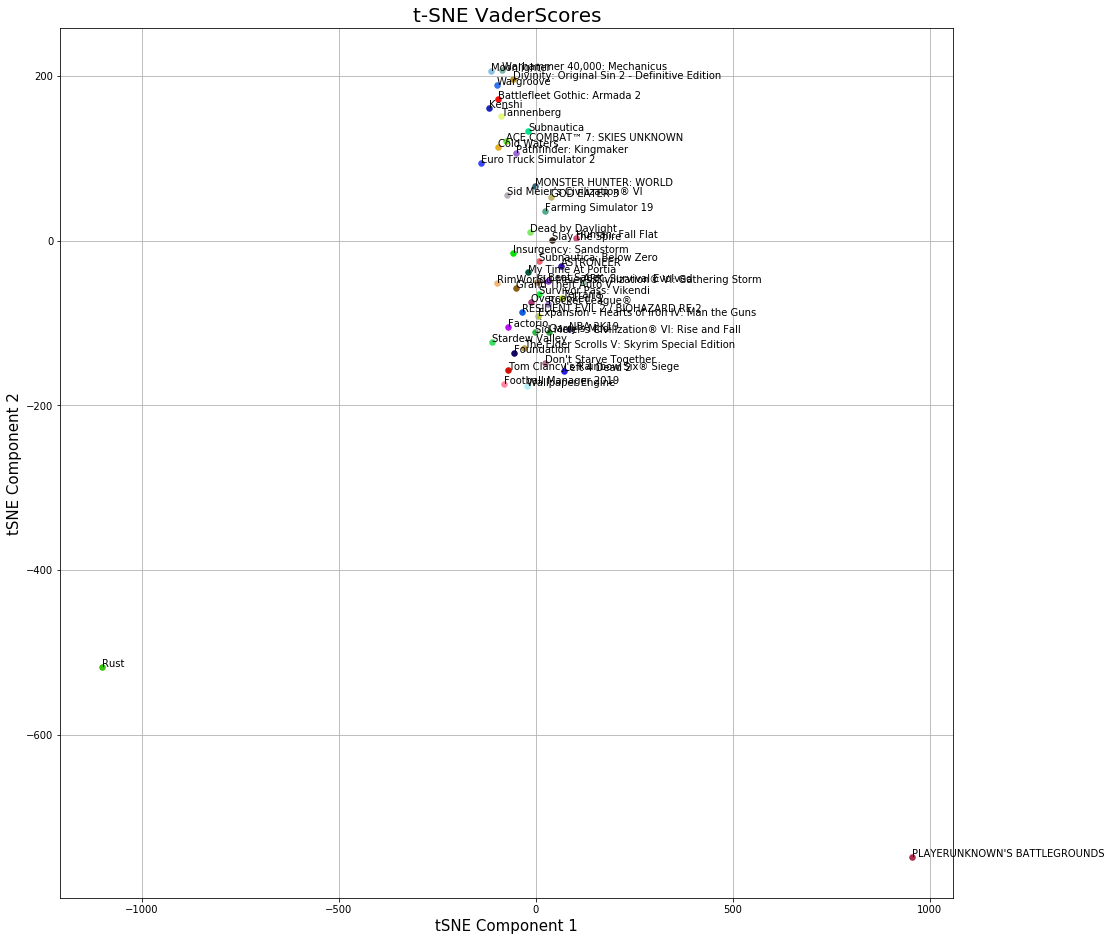

In [55]:

p1 =tSNEdataFinal.loc[:,"tSNE component 1"].values;
p2 =tSNEdataFinal.loc[:,"tSNE component 2"].values;


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tSNE Component 1', fontsize = 15)
ax.set_ylabel('tSNE Component 2', fontsize = 15)
ax.set_title('t-SNE VaderScores', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width *2, box.height*2])

targets = []
colors = []

titles = tSNEdataFinal.loc[:,"title"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = tSNEdataFinal['title'] == target
    ax.scatter(tSNEdataFinal.loc[indicesToKeep, 'tSNE component 1']
               , tSNEdataFinal.loc[indicesToKeep, 'tSNE component 2']
               , c = color
               , s = 30)

ax.grid()

for x in range(len(titles)):
    ax.text(p1[x] , p2[x], titles[x], fontsize=10)



#ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))


In [11]:
earlyaccess = preFormattedData.loc[:,"is_early_access_review"].values

numeratedAccess = []

for x in range(len(earlyaccess)):
    if earlyaccess[x]:
        numeratedAccess.append(1)
    else:
        numeratedAccess.append(0)


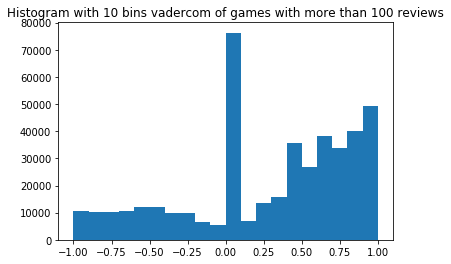

In [22]:
vaderComHist = plt.hist(vaderScoresComp, bins= 20) 
plt.title("Histogram with 10 bins vadercom of games with more than 100 reviews")

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

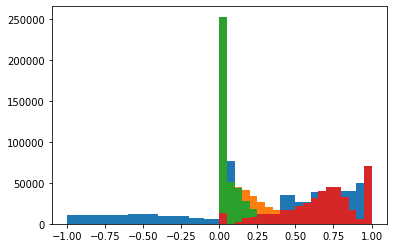

In [13]:
#turning vaderScores into bins and stadarize the data



def TurnScoreIntoHistogramBins( score):
    hisScore = plt.hist(score, bins= 20)
    scoreBins = np.array(hisScore[0])
    scoreBins= scoreBins.reshape(-1, 1)
    scoreBins= StandardScaler().fit_transform(scoreBins)
    
    return scoreBins


vaderComBins = TurnScoreIntoHistogramBins(vaderScoresComp)
vaderPosBins = TurnScoreIntoHistogramBins(vaderScoresPos)
vaderNegBins = TurnScoreIntoHistogramBins(vaderScoresNeg)
vaderNeuBins = TurnScoreIntoHistogramBins(vaderScoresNeu)



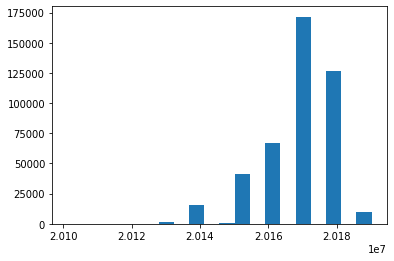

In [14]:
# turn numerizedTime into histogram bins

numerizedDatesBins = TurnScoreIntoHistogramBins(numerizedDates)


In [40]:
#standariz and order the data All vaderScores




allExtractedData =np.transpose([numerizedDatesBins,vaderNeuBins,vaderNegBins,vaderPosBins,vaderComBins])
allExtractedData = allExtractedData[0]

tempnames = ["time","vaderNeu","vaderNeg","vaderPos","vaderCom"]

pd.DataFrame(data = allExtractedData, columns = tempnames).head()



,time,vaderNeu,vaderNeg,vaderPos,vaderCom
0,-0.470945,-0.522049,4.209842,3.780672,-0.611624
1,-0.470967,-1.245612,0.524443,0.341264,-0.632961
2,-0.470728,-1.144611,0.398901,0.952365,-0.636119
3,-0.470967,-0.856367,0.105872,0.787042,-0.612567
4,-0.470728,-0.791598,-0.072765,0.507232,-0.527056


In [41]:
# PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(allExtractedData)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,5.005898,2.790551
1,1.348875,-0.733925
2,1.597799,-0.524891
3,1.219907,-0.564163
4,0.904790,-0.681699


In [43]:
# formatting the principal components



p1 =principalDf.loc[:,"principal component 1"].values;
p2 =principalDf.loc[:,"principal component 2"].values;
name =["bin1","bin2","bin3","bin4","bin5","bin6","bin7","bin8","bin9","bin10","bin11","bin12","bin13","bin14","bin15","bin16","bin17","bin18","bin19","bin20"]




dataforPlot = [ p1,p2,name]

dataforPlot = np.transpose(dataforPlot)
tempnames = ["principal component 1","principal component 2","title"]

finalDf = pd.DataFrame(data = dataforPlot, columns = tempnames)

finalDf.head()

,principal component 1,principal component 2,title
0,5.005898302478297,2.790551258365792,bin1
1,1.3488753812165295,-0.7339251364433879,bin2
2,1.5977993787447118,-0.5248906824631573,bin3
3,1.2199071215479727,-0.5641633996869618,bin4
4,0.9047901466230988,-0.6816994763212791,bin5


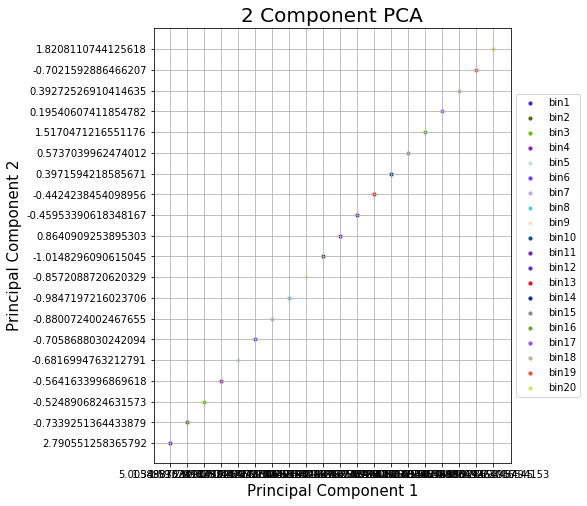

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

targets = []
colors = []

titles = finalDf.loc[:,"title"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['title'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)

ax.grid()



ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))


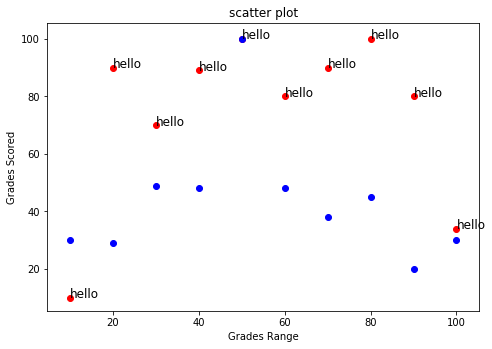

In [11]:



girls_grades = [10, 90, 70, 89, 100, 80, 90, 100, 80, 34]
boys_grades = [30, 29, 49, 48, 100, 48, 38, 45, 20, 30]
grades_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
thetext = ["hello","hello","hello","hello","hello","hello","hello","hello","hello","hello"]

fig=plt.figure()


ax=fig.add_axes([0,0,1,1])
ax.scatter(grades_range, girls_grades, color='r')
ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Grades Range')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')

for x in range(len(thetext)):
    ax.text(grades_range[x] , girls_grades[x], thetext[x], fontsize=12)



plt.show()

In [35]:
doc2VecData = pd.read_csv("D:\my data\doc2VecData.csv")
#ReviewData = pd.read_csv("D:\my data\export_dataframe.csv")
doc2VecData.head()

,1,2,3,4,5,6,7,8
0,0.311871,0.621097,0.989961,-3.109607,-1.424479,2.909328,1.865615,-0.033695
1,-0.055303,0.107044,0.203028,0.407245,0.427311,0.754972,0.409892,0.346133
2,0.656531,-0.833871,-0.265416,0.872329,0.227157,1.996259,0.067746,0.139980
3,-0.874732,2.318967,1.594518,-0.156381,0.157943,-0.883336,-0.166654,3.399741
4,-1.006257,-1.231680,2.315717,-0.700216,2.090066,-0.785346,-1.132183,2.358244


In [36]:
print(len(doc2VecData))

434891


In [38]:
print(len(ReviewData))



434891


In [43]:
names =SortedGameData.loc[:,"Name"].values
numbers = SortedGameData.loc[:,"Number"].values


vec1 = doc2VecData.loc[:,"1"].values
vec2 = doc2VecData.loc[:,"2"].values
vec3 = doc2VecData.loc[:,"3"].values
vec4 = doc2VecData.loc[:,"4"].values
vec5 = doc2VecData.loc[:,"5"].values
vec6 = doc2VecData.loc[:,"6"].values
vec7 = doc2VecData.loc[:,"7"].values
vec8 = doc2VecData.loc[:,"8"].values



allNewData = []

startIndex = 0
for x in range(len(names)):
    individualGameData =[]
    
    for num in range(200):
        if num < numbers[x]:
            individualGameData.append(vec1[num+startIndex])
            individualGameData.append(vec2[num+startIndex])
            individualGameData.append(vec3[num+startIndex])
            individualGameData.append(vec4[num+startIndex])
            individualGameData.append(vec5[num+startIndex])
            individualGameData.append(vec6[num+startIndex])
            individualGameData.append(vec7[num+startIndex])
            individualGameData.append(vec8[num+startIndex])
        else:
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
            individualGameData.append(0)
    allNewData.append(np.transpose(individualGameData))
    startIndex = startIndex +numbers[x]
        
    

formattedDataForPCA =allNewData
allNewData =np.transpose(allNewData)
longdata =pd.DataFrame(data = allNewData, columns = names)

longdata.to_csv (r'D:\my data\longdataSorted.csv', index = False, header=True)

longdata.head(10)

,Expansion - Hearts of Iron IV: Man the Guns,Dead by Daylight,Wargroove,Wallpaper Engine,Factorio,Insurgency: Sandstorm,Cold Waters,Tannenberg,Pathfinder: Kingmaker,MONSTER HUNTER: WORLD,...,Don't Starve Together,Rust,Subnautica,ACE COMBAT™ 7: SKIES UNKNOWN,Left 4 Dead 2,ARK: Survival Evolved,Battlefleet Gothic: Armada 2,The Elder Scrolls V: Skyrim Special Edition,Human: Fall Flat,"Warhammer 40,000: Mechanicus"
0,0.311871,-0.874732,0.519584,-0.053869,-1.725590,1.407855,0.827982,-0.492142,3.077265,3.836980,...,-1.553695,0.654280,0.361412,-0.332330,0.506093,-1.373032,1.181642,2.035179,2.125321,2.485903
1,0.621097,2.318967,-0.829293,0.119747,-4.614191,-1.157933,-2.904468,0.503175,-0.093114,-0.370985,...,-2.670482,-0.235956,0.026631,-0.422810,1.222586,-0.528998,-0.518453,0.373307,-0.193807,-2.856400
2,0.989961,1.594518,0.885931,0.390825,5.253755,-0.485365,2.294922,1.240848,-0.365917,0.328609,...,1.739858,0.956293,-0.347429,-0.259756,-0.717467,-0.832081,0.779545,0.881951,0.522685,1.712195
3,-3.109607,-0.156381,-0.647323,0.268509,-1.906010,0.503196,-0.710705,0.843668,-0.676069,0.767521,...,-1.932990,-1.360843,-1.338756,-0.797554,-0.705294,1.762258,0.575821,-0.383495,0.887373,-1.813141
4,-1.424479,0.157943,-1.301403,0.490999,0.207909,0.275206,-1.880051,-0.732204,0.217501,1.067076,...,-1.101609,2.197126,0.575375,-0.221726,1.682304,0.474538,0.150282,1.334386,-1.617288,-1.450531
5,2.909328,-0.883336,1.258773,1.053165,0.553479,0.606638,1.025970,0.508076,-0.168064,1.057670,...,-0.220861,-0.666912,0.378885,1.538774,0.002007,1.659503,1.809419,1.931219,1.250169,1.367780
6,1.865615,-0.166654,0.423270,0.502715,1.247448,0.383959,1.656308,0.813889,1.191685,2.376413,...,1.168936,-0.776701,0.430623,1.161613,0.881996,1.148348,-0.391021,0.302105,0.733941,-0.049327
7,-0.033695,3.399741,0.361122,0.661183,0.152838,1.405269,0.606629,0.134291,0.995249,-2.030994,...,2.789721,1.880114,1.534359,0.527497,0.827568,0.971886,-0.279735,-1.460777,0.728642,1.960090
8,-0.055303,-1.006257,1.607555,0.817702,0.405987,-0.271128,-0.020126,2.176354,0.820357,-0.075148,...,1.129391,1.240933,0.232906,0.250098,0.286511,0.012428,2.793740,1.122413,0.813857,1.392785
9,0.107044,-1.231680,-0.545793,-1.782413,1.387143,-0.629493,-2.843472,-1.671116,-1.600029,-3.047673,...,-0.340232,-0.065457,-3.492933,-2.192304,0.274740,-0.664567,-2.137620,-0.219929,1.374947,-0.732818


In [69]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(formattedDataForPCA)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()



NameError: name 'formattedDataForPCA' is not defined

In [3]:
import os
import gensim
import smart_open
from gensim.test.utils import get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [4]:
descriptions = ReviewData.loc[:,"review"].values

for x in range(len(descriptions)):
    if type(descriptions[x]) is float:
        descriptions[x] = str(descriptions[x])



def read_corpus_modified(reviews, tokens_only=False):
    for x in range(len(reviews)):
        tokens = gensim.utils.simple_preprocess(reviews[x])
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [x])               

In [5]:
train_corpus = list(read_corpus_modified(descriptions))

In [8]:
print(train_corpus[1])

TaggedDocument(['so', 'before', 'begin', 'with', 'this', 'review', 'yeah', 'we', 'all', 'know', 'rust', 'is', 'laggy', 'piece', 'of', 'sh', 'sometimes', 'so', 'won', 'discuss', 'this', 'here', 'pros', 'great', 'concept', 'stunning', 'graphics', 'game', 'mechanics', 'are', 'great', 'the', 'combat', 'system', 'is', 'good', 'the', 'crafting', 'system', 'is', 'very', 'good', 'weekly', 'updates', 'which', 'is', 'one', 'of', 'the', 'most', 'important', 'things', 'for', 'an', 'early', 'access', 'game', 'good', 'and', 'serious', 'developers', 'who', 'listen', 'to', 'the', 'community', 'modding', 'is', 'easy', 'and', 'the', 'community', 'has', 'almost', 'full', 'access', 'to', 'modding', 'skinscons', 'not', 'optimised', 'for', 'extreme', 'potato', 'users', 'but', 'that', 'is', 'not', 'main', 'problem', 'the', 'community', 'can', 'be', 'cancerous', 'at', 'times', 'but', 'that', 'is', 'life', 'not', 'everyone', 'you', 'meet', 'will', 'be', 'nice', 'or', 'help', 'you', 'server', 'creation', 'is', 

In [15]:

newModel = Doc2Vec(train_corpus, vector_size=50, window=2, min_count=1,negative=0, workers=4,hs = 1)

#newModel = Doc2Vec(train_corpus, vector_size=50, window=2, min_count=1, workers=4)


In [5]:
# dont use this
fname = get_tmpfile("my_doc2vec_model")severa
#newModel.save(fname)

newModel = Doc2Vec.load(fname)  # you can continue training with the loaded model!

In [16]:
newModel.train(train_corpus, total_examples=newModel.corpus_count, epochs=100)

In [53]:
newModel.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

In [14]:
Doc2Vec.update_weights(negative =0)


AttributeError: type object 'Doc2Vec' has no attribute 'update_weights'

In [5]:
vector = newModel.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector)

[ 0.35523543 -2.694589    0.17981891 -0.54650223  2.816497   -0.49688858
 -0.09464488 -0.12040503  0.35992718 -0.37318113  0.39903206  0.53754485
  2.0820932  -1.6811087  -0.13673295  1.6948224  -0.8126966  -1.526237
  0.07873281  1.4379252   1.9583967   0.21490477 -1.3538688   0.07650207
  1.663782   -0.22957392 -0.33055016 -0.19951509 -0.12331024 -0.827509
  1.1572775   0.98412853  1.3043417   0.69161236 -0.8048229  -1.2113556
 -0.9069391   0.71976525 -0.74082977 -2.3060505  -0.6642423  -0.37697753
 -0.6241286  -1.4553468  -1.1837174  -0.1712892  -0.27597705 -0.01108548
 -0.19612256  2.2602305 ]


In [6]:
descriptionseperatedReviews = list(read_corpus_modified(descriptions, tokens_only=True))



In [7]:
doc2Vec = []

for x in range(len(descriptionseperatedReviews)):
    doc2Vec.append(newModel.infer_vector(descriptionseperatedReviews[x]))

In [8]:
#2 component
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(doc2Vec)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,0.632281,-1.181567
1,-0.733361,-0.544452
2,1.670658,0.799220
3,0.676694,-0.885207
4,1.841683,1.338758


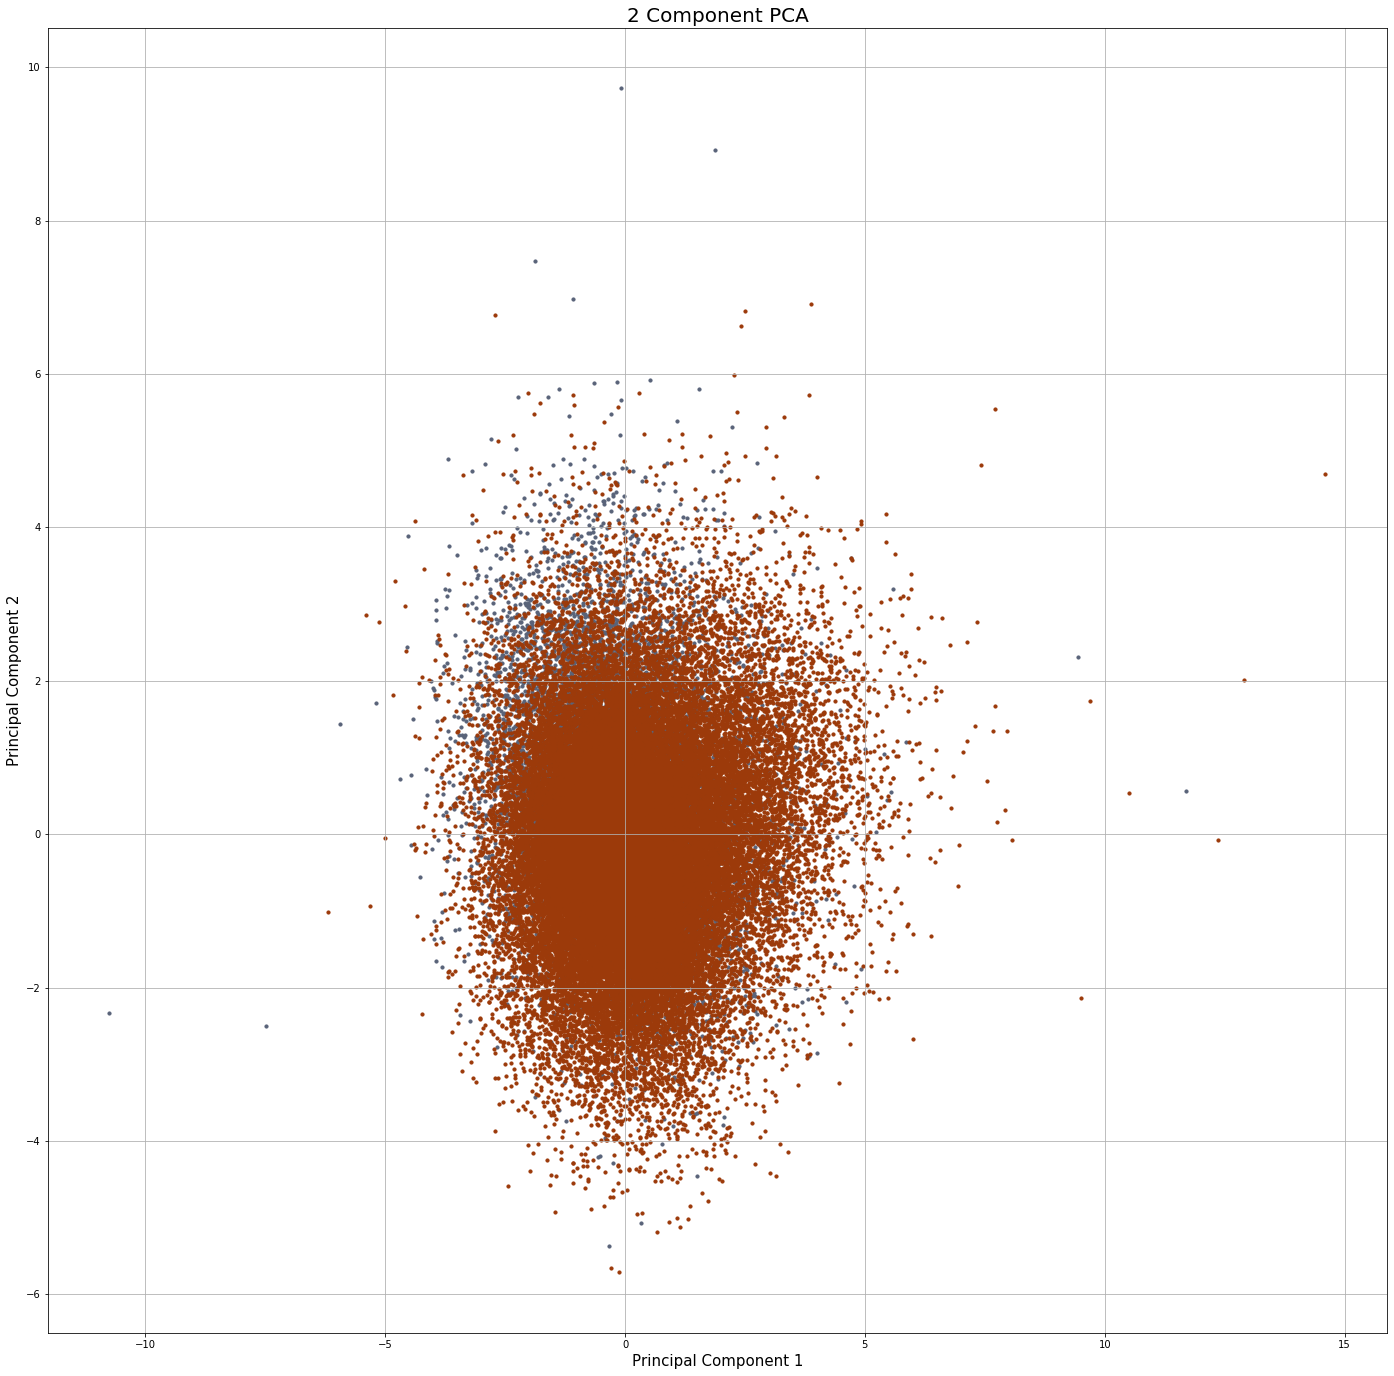

In [9]:

p1 =principalDf.loc[:,"principal component 1"].values;
p2 =principalDf.loc[:,"principal component 2"].values;
name =ReviewData.loc[:,"recommendation"].values;



dataforPlot = [ p1,p2,name]

dataforPlot = np.transpose(dataforPlot)
tempnames = ["principal component 1","principal component 2","recommendation"]

finalDf = pd.DataFrame(data = dataforPlot, columns = tempnames)




fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width*3 , box.height*3])

targets = []
colors = []

titles = finalDf.loc[:,"recommendation"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])


for target, color in zip(targets,colors):
    indicesToKeep = finalDf['recommendation'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)

ax.grid()

#for x in range(len(titles)):
 #   ax.text(p1[x] , p2[x], titles[x], fontsize=10)


In [10]:
print(targets)
print(colors)

['Not Recommended', 'Recommended']
[[array([0.34953306, 0.3868435 , 0.47494079])], [array([0.61341915, 0.22866198, 0.03915978])]]


In [11]:
import time
time_start = time.time()
# perplexity 10 for  , , the low count games and 20 for higher


X_embedded = TSNE(n_components=2,perplexity=10,n_iter =3000).fit_transform(doc2Vec)
print(format(time.time()-time_start))

3663.8685615062714


In [12]:
tSNEdata = pd.DataFrame(data = X_embedded
             , columns = ['tSNE component 1', 'tSNE component 2'])



tSNEdataFinal = pd.concat([tSNEdata, ReviewData[['recommendation']]], axis = 1)




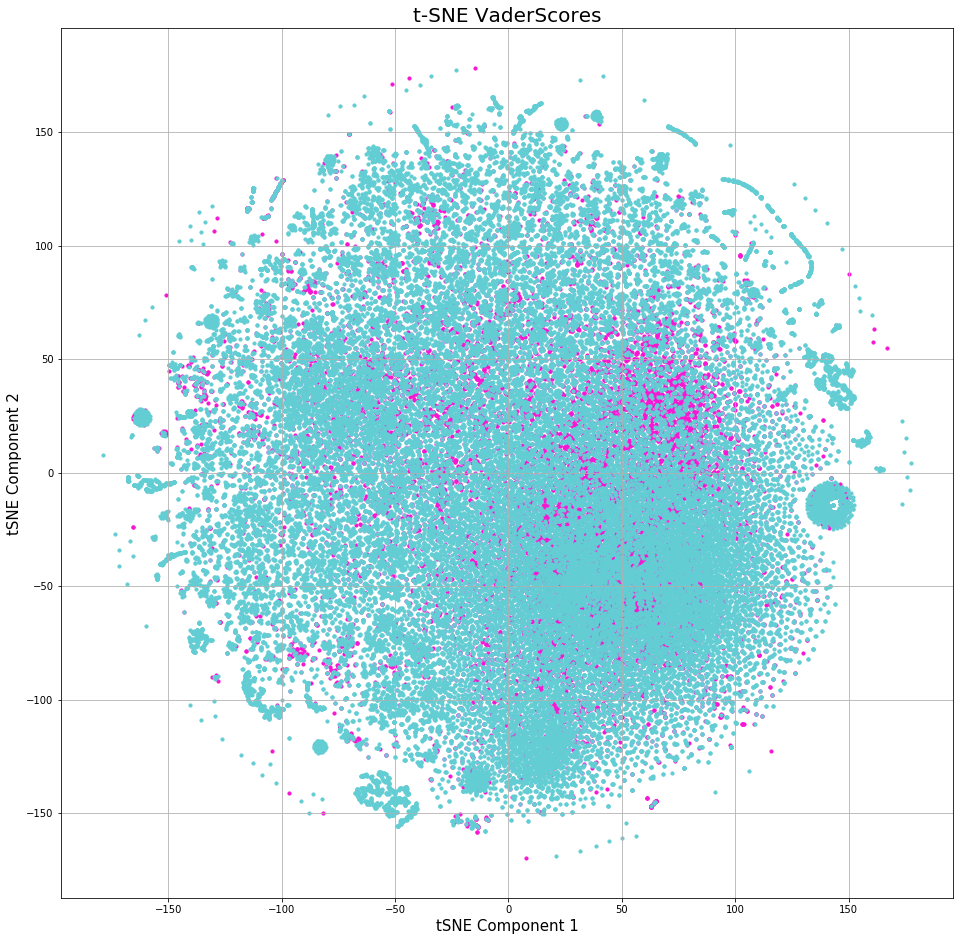

In [13]:

p1 =tSNEdataFinal.loc[:,"tSNE component 1"].values;
p2 =tSNEdataFinal.loc[:,"tSNE component 2"].values;


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tSNE Component 1', fontsize = 15)
ax.set_ylabel('tSNE Component 2', fontsize = 15)
ax.set_title('t-SNE VaderScores', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width *2, box.height*2])

targets = []
colors = []

titles = tSNEdataFinal.loc[:,"recommendation"].values

for x in range(len(titles)):
    if titles[x] not in targets:
        
        targets.append(titles[x])
        colors.append([np.random.rand(3,)])
        
        


for target, color in zip(targets,colors):
    indicesToKeep = tSNEdataFinal['recommendation'] == target
    ax.scatter(tSNEdataFinal.loc[indicesToKeep, 'tSNE component 1']
               , tSNEdataFinal.loc[indicesToKeep, 'tSNE component 2']
               , c = color
               , s = 10)

ax.grid()

#for x in range(len(titles)):
 #   ax.text(p1[x] , p2[x], titles[x], fontsize=10)



#ax.legend(labels =targets, loc='center left', bbox_to_anchor=(1, 0.5))

In [14]:
print(targets)
print(colors)

['Not Recommended', 'Recommended']
[[array([0.96665785, 0.09001427, 0.8277361 ])], [array([0.38930756, 0.8020784 , 0.8306087 ])]]


In [9]:
name =ReviewData.loc[:,"overview"].values;
print(name[3
          ])

Take the helm of a gigantic capital ship and get ready for battle. Regular Episodes give you new maps and ways to fight - or play 5-v-5 PvE or PvP in classic Conquest – the high intensity moments of a shooter combine with careful team tactics and positioning as you battle across a multi-sector map.Fractured Space is an award winning team game. You can choose to play alone with a team of bots to help you, with other players against a team of AI, or in full PvP. New episodes are introduced regularly and are free-to-play, though all the legacy episodes and their content packs are also available for purchase and solo play.The game puts you in control of an immense capital ship, and there are dozens to unlock and select. Each ship has its own strengths and weakness, and a carefully selected crew can make all the difference in battle. Battle is what it’s all about – whether you fight in 5-v-5 Conquest against other players or take on the challenges of each new Episode, your tactics will be p

In [13]:
import gensim
import gensim.downloader as api

# Download dataset
dataset = api.load("text8")
data = [d for d in dataset]

In [14]:
import os
import gensim
# Set file names for train and test data
test_data_dir = os.path.join(gensim.__path__[0], 'test', 'test_data')
lee_train_file = os.path.join(test_data_dir, 'lee_background.cor')
lee_test_file = os.path.join(test_data_dir, 'lee.cor')

In [5]:
import smart_open

def read_corpus(fname, tokens_only=False):
    with smart_open.open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(lee_train_file))
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))

In [6]:
print(train_corpus[:2])

[TaggedDocument(words=['hundreds', 'of', 'people', 'have', 'been', 'forced', 'to', 'vacate', 'their', 'homes', 'in', 'the', 'southern', 'highlands', 'of', 'new', 'south', 'wales', 'as', 'strong', 'winds', 'today', 'pushed', 'huge', 'bushfire', 'towards', 'the', 'town', 'of', 'hill', 'top', 'new', 'blaze', 'near', 'goulburn', 'south', 'west', 'of', 'sydney', 'has', 'forced', 'the', 'closure', 'of', 'the', 'hume', 'highway', 'at', 'about', 'pm', 'aedt', 'marked', 'deterioration', 'in', 'the', 'weather', 'as', 'storm', 'cell', 'moved', 'east', 'across', 'the', 'blue', 'mountains', 'forced', 'authorities', 'to', 'make', 'decision', 'to', 'evacuate', 'people', 'from', 'homes', 'in', 'outlying', 'streets', 'at', 'hill', 'top', 'in', 'the', 'new', 'south', 'wales', 'southern', 'highlands', 'an', 'estimated', 'residents', 'have', 'left', 'their', 'homes', 'for', 'nearby', 'mittagong', 'the', 'new', 'south', 'wales', 'rural', 'fire', 'service', 'says', 'the', 'weather', 'conditions', 'which', '

In [62]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, negative=0, epochs=40)

In [63]:
model.build_vocab(train_corpus)

In [64]:
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [20]:
vector = model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])
print(vector)

[ 0.00070021  0.00113383 -0.00928655 -0.00860503 -0.0020717   0.00336092
  0.00494514  0.00498472 -0.00342857  0.00789513 -0.00989864 -0.00431796
 -0.00412498 -0.0049462   0.00168003  0.00943981 -0.00997407 -0.0080801
  0.00854588 -0.00944375  0.00378177  0.0056755   0.00028266 -0.00979335
 -0.00612158  0.00663354  0.00114284 -0.00851673  0.00917229  0.00662351
  0.00982187  0.00019394 -0.0047657   0.00976774 -0.00017886 -0.00648391
  0.00548747  0.00336382  0.00818237 -0.0025561   0.0023561   0.00032074
 -0.00312056  0.00999496  0.00156392  0.00681077  0.00691511  0.00897226
  0.00031756 -0.00429047]


In [24]:
descriptions = ReviewData.loc[:,"overview"].values

def read_corpus_modified(reviews, tokens_only=False):
    for x in range(len(reviews)):
        tokens = gensim.utils.simple_preprocess(reviews[x])
        if tokens_only:
            yield tokens
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(tokens, [x])          

In [148]:



TokenizedData = list(read_corpus_modified(descriptions,tokens_only=True))

In [49]:
print(TokenizedData[0])

['tl', 'dr', 'this', 'is', 'how', 'you', 'fix', 'title', 'from', 'an', 'imperfect', 'launch', 'good', 'dev', 'response', 'important', 'features', 'added', 'capcom', 'cares', 'probably', 'the', 'biggest', 'recovery', 'from', 'launch', 'of', 'any', 'game', 'ever', 'excellent', 'fixes', 'great', 'work', 'from', 'the', 'developers', 'and', 'community', 'managers', 'little', 'to', 'no', 'bs', 'mouse', 'fixes', 'network', 'fixes', 'prolonged', 'events', 'and', 'continued', 'support', 'for', 'those', 'with', 'continued', 'network', 'issues', 'while', 'clumsy', 'launch', 'is', 'always', 'best', 'to', 'avoid', 'the', 'gameplay', 'and', 'response', 'from', 'capcom', 'to', 'the', 'issues', 'they', 've', 'caused', 'has', 'been', 'more', 'than', 'acceptable', 'these', 'guys', 'care', 'about', 'making', 'good', 'game', 'into', 'great', 'one']


In [149]:
doc2Vec = []

for x in range(len(TokenizedData)):
    doc2Vec.append(model.infer_vector(TokenizedData[x]))

NameError: name 'model' is not defined

In [42]:
reviewText = steamReviews.loc[:,"review"].values


for x in range(len(reviewText)):
    if type(reviewText[x]) is float:
        reviewText[x] = str(reviewText[x])


train_corpus = list(read_corpus_modified(reviewText))

In [60]:
train_corpus = list(read_corpus_modified(descriptions))

In [16]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [8]:
centers = [[1, 1], [-1, -1], [1, -1],[.5,0]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [17]:
# Compute DBSCAN
#2.2 20 first 2
#artroneed and evil 2.2 5
#player unkown 2.2 10
db = DBSCAN(eps=2.2, min_samples=10).fit(X_embedded)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 464
Estimated number of noise points: 3528


In [23]:
#print(len(X_embedded))
#print(len(db.labels_))
#print(X_embedded)
#print(db.labels_)

textReviews = ReviewData.loc[:,"review"].values
print(len(textReviews))

99956


In [17]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 24
Estimated number of noise points: 21593


NameError: name 'labels_true' is not defined

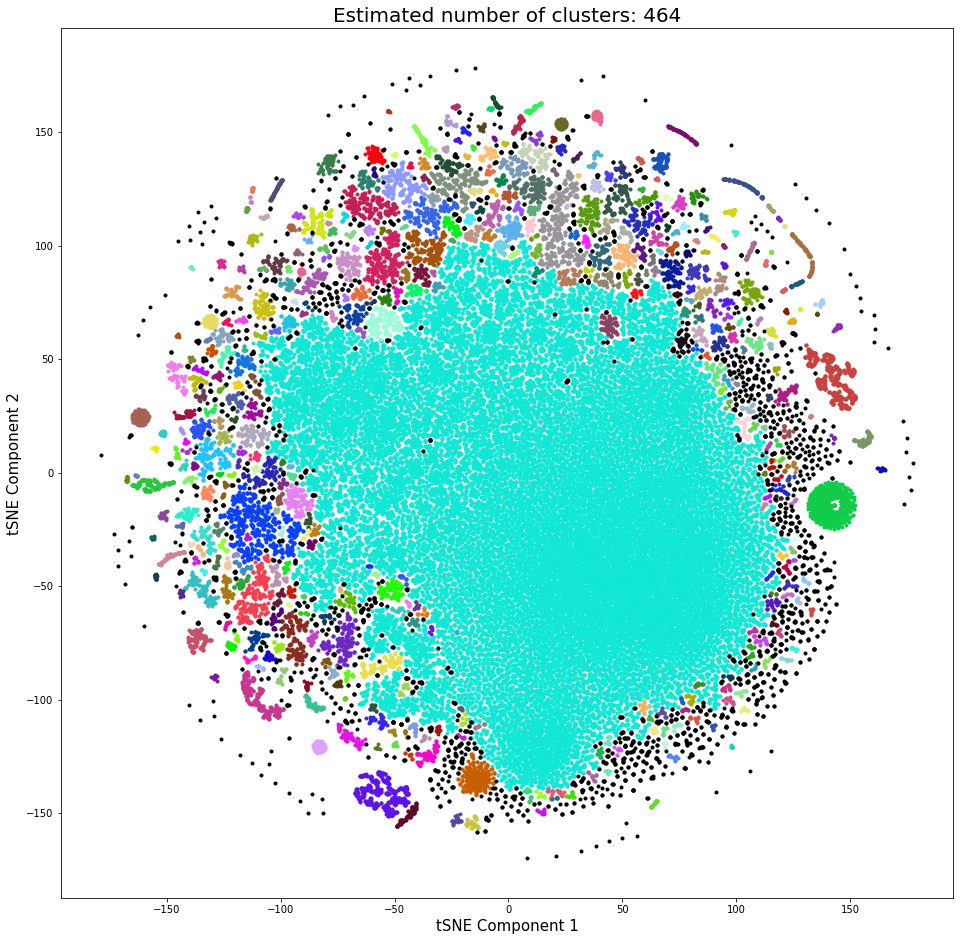

In [18]:
# Plot result
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tSNE Component 1', fontsize = 15)
ax.set_ylabel('tSNE Component 2', fontsize = 15)
ax.set_title('Estimated number of clusters: %d' % n_clusters_, fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width *2, box.height*2])

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]



for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = [np.random.rand(),np.random.rand(),np.random.rand(),1]
    
    
    

    class_member_mask = (labels == k)

    xy = X_embedded[class_member_mask & core_samples_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),markeredgecolor=tuple(col), markersize=3)

    xy = X_embedded[class_member_mask & ~core_samples_mask]
    ax.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor=tuple(col), markersize=3)


plt.show()

KeyError: False

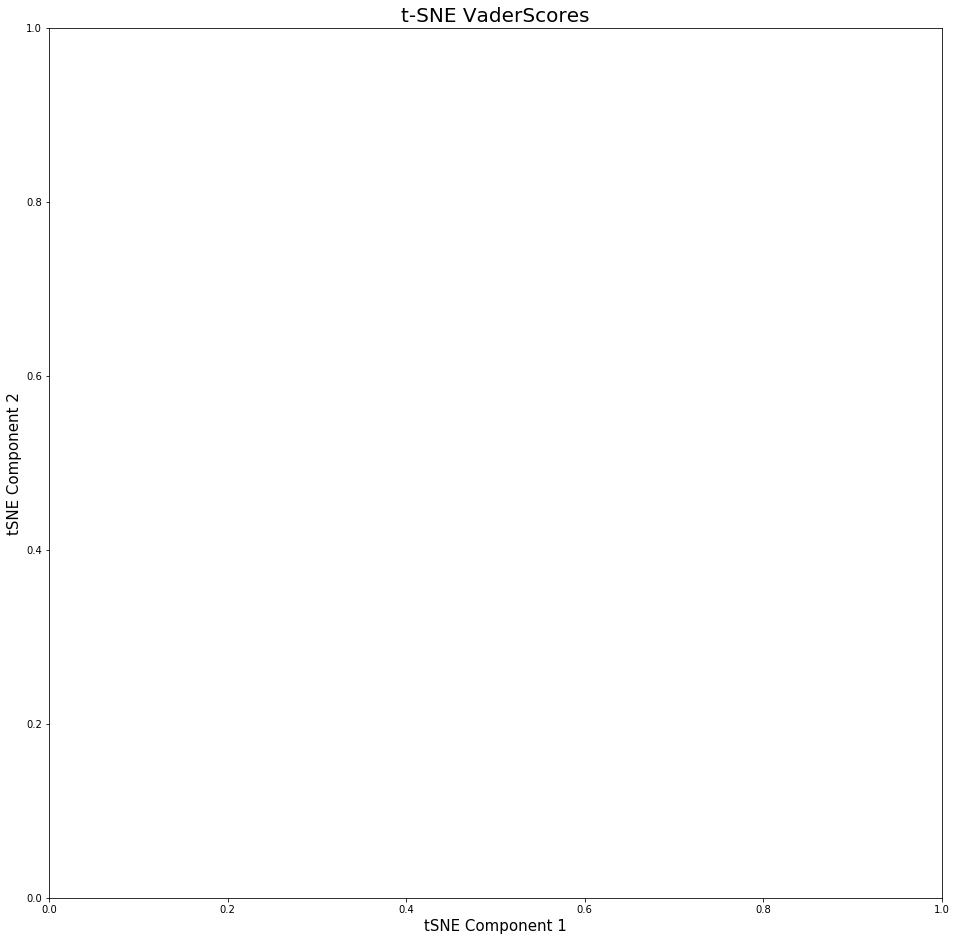

In [122]:

p1 =tSNEdataFinal.loc[:,"tSNE component 1"].values;
p2 =tSNEdataFinal.loc[:,"tSNE component 2"].values;


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tSNE Component 1', fontsize = 15)
ax.set_ylabel('tSNE Component 2', fontsize = 15)
ax.set_title('t-SNE VaderScores', fontsize = 20)


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width *2, box.height*2])

targets = []
colors = []

titles = tSNEdataFinal.loc[:,"recommendation"].values

unique_labels = set(labels)



for label in zip(unique_labels):
    if label not in targets:
        targets.append(label)
        colors.append([np.random.rand(3,)])
        
        
        
        
        


for target, color in zip(targets,colors):
    indicesToKeep = unique_labels == target
    ax.scatter(tSNEdataFinal.loc[indicesToKeep, 'tSNE component 1']
               , tSNEdataFinal.loc[indicesToKeep, 'tSNE component 2']
               , c = color
               , s = 10)

ax.grid()


In [121]:
unique_labels = set(labels)
unique_labels =np.array(unique_labels)
print(unique_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, -1}


In [123]:
targets = []
colors = []

titles = tSNEdataFinal.loc[:,"recommendation"].values

unique_labels = set(labels)



for label in zip(unique_labels):
    if label not in targets:
        targets.append(label)
        colors.append([np.random.rand(3,)])

In [126]:
print(len( targets))

47


In [127]:
print(len(colors))

47


In [195]:
# s
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

# save to csv file
savetxt('GTAVdoc2vecTsne.csv', X_embedded, delimiter=',')


In [4]:

# load numpy array from csv file
from numpy import loadtxt
# load array
data = loadtxt('GTAVdoc2vecTsne.csv', delimiter=',')



In [5]:
X_embedded = data

In [18]:
#print(len(X_embedded))
#print(len(db.labels_))
#print(X_embedded)
#print(db.labels_)

textReviews = ReviewData.loc[:,"review"].values
print(len(textReviews))

67907


In [19]:
# get vader scores from reviews

textReviews = ReviewData.loc[:,"review"].values
analyzer = SentimentIntensityAnalyzer()

import time
time_start = time.time()

vaderScoresComp = []
vaderScoresPos = []
vaderScoresNeg = []
vaderScoresNeu = []


for x in range(len(textReviews)):
    if type(textReviews[x]) is float:
        textReviews[x] = str(textReviews[x])
    vs = analyzer.polarity_scores(textReviews[x])
    vaderScoresComp.append(vs["compound"])
    vaderScoresPos.append(vs["pos"])
    vaderScoresNeg.append(vs["neg"])
    vaderScoresNeu.append(vs["neu"])



print("done")
print(format(time.time()-time_start))

done
49.97885847091675


In [20]:
labeledData = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

blobSize = []
blobNegative = []
blobPositive = []
blobNeutral = []

for y in range(n_clusters_):
    sizeSum = 0
    negSum = 0
    posSum = 0
    neuSum = 0
    
    for x in range(len(labeledData)):
        if labeledData[x] == y:
            sizeSum +=1
            neuSum += vaderScoresNeu[x]
            posSum += vaderScoresPos[x]
            negSum +=vaderScoresNeg[x]
            
    blobSize.append(sizeSum/len(labeledData))
    blobNegative.append(negSum/sizeSum)
    blobPositive.append(posSum/sizeSum)
    blobNeutral.append(neuSum/sizeSum)
    

    


In [29]:
names = ["Blob Size","Blob Negative","Blob Positive","Blob Neutral"]
tempData = [blobSize,blobNegative,blobPositive,blobNeutral]
tempData = np.transpose(tempData)
blobData =pd.DataFrame(data = tempData, columns = names)

blobData.head(10)

,Blob Size,Blob Negative,Blob Positive,Blob Neutral
0,0.863116,0.107149,0.197739,0.695112
1,0.008038,0.002430,0.011658,0.985912
2,0.005821,0.000310,0.002163,0.997527
3,0.000151,0.053000,0.163818,0.783136
4,0.005889,0.006364,0.012216,0.981421
5,0.004153,0.000000,0.724243,0.275757
6,0.000625,0.000000,0.969473,0.030527
7,0.005038,0.000000,0.790947,0.209053
8,0.001359,0.010061,0.552253,0.437682
9,0.000110,0.128750,0.361688,0.509563


In [30]:
blobData.to_csv (r'D:\my data\PlayerUnkownDatablobData.csv', index = False, header=True)

In [31]:
gayman = pd.read_csv("D:\my data\PlayerUnkownDatablobData.csv")
gayman.head()

,Blob Size,Blob Negative,Blob Positive,Blob Neutral
0,0.863116,0.107149,0.197739,0.695112
1,0.008038,0.002430,0.011658,0.985912
2,0.005821,0.000310,0.002163,0.997527
3,0.000151,0.053000,0.163818,0.783136
4,0.005889,0.006364,0.012216,0.981421


In [5]:
ReviewData = pd.read_csv("Master Data - Form responses 1.csv")
#ReviewData = pd.read_csv("D:\my data\export_dataframe.csv")
ReviewData.head()

,Timestamp,Cluster,Thoughts
0,17/09/2020 22:30:30,residentevil,iT DIDN=T LOOK LIKE NO OTHER
1,17/09/2020 22:30:55,ROCKETLEAGUE Atroneer SKYRIM,bIG CIRKEL AND LIGHT BLUE
2,17/09/2020 22:31:22,GTAV,Lighy blue and small dots
3,17/09/2020 22:31:46,monsterHunter RUST PlayerUnkown deadbyDaylight,Lage amount of small dots
4,17/09/2020 22:39:17,ROCKETLEAGUE Atroneer SKYRIM,Has the most light blueish surfice in the imag...


In [25]:
clusters = ReviewData.loc[:,"Cluster"].values

name = "SKYRIM"
names ="monsterHunter", "ROCKETLEAGUE", "RUST", "PlayerUnkown", "deadbyDaylight", "Atroneer", "GTAV", "SKYRIM", "residentevil"
reps = 0

sharedSpace = [0,0,0,0,0,0,0,0,0]


for x in range(len(clusters)):
    if(name in clusters[x]):
        for y in range(len(names)):
            if( names[y] in clusters[x]):
                sharedSpace[y] = sharedSpace[y]+1;
            
        
    

for x in range(len(sharedSpace)):
    print(str(name)+" were grouped with "+ str(names[x])+" "+str(sharedSpace[x])+" times")


SKYRIM were grouped with monsterHunter 6 times
SKYRIM were grouped with ROCKETLEAGUE 17 times
SKYRIM were grouped with RUST 7 times
SKYRIM were grouped with PlayerUnkown 6 times
SKYRIM were grouped with deadbyDaylight 6 times
SKYRIM were grouped with Atroneer 18 times
SKYRIM were grouped with GTAV 11 times
SKYRIM were grouped with SKYRIM 19 times
SKYRIM were grouped with residentevil 7 times


In [38]:
clusters = ReviewData.loc[:,"Cluster"].values

name1 = "residentevil"

names ="monsterHunter", "ROCKETLEAGUE", "RUST", "PlayerUnkown", "deadbyDaylight", "Atroneer", "GTAV", "SKYRIM", "residentevil"
reps = 0

sharedSpace = [0,0,0,0,0,0,0,0,0]


for x in range(len(clusters)):
    if(name1 == clusters[x]):
        reps= reps+1
        
            
        
    
print(reps)

7


In [12]:
sharedspace = ne

sharedspace[0] =10

IndexError: list assignment index out of range